In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

Working with asthma data first

In [135]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/asthma_data.csv')
df.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Asthma_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,9.8
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,10.9
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,10.1
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.8
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,9.2


In [136]:
np.mean(df['Asthma_prevalence'])

10.031229346127787

In [137]:
df.describe()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Asthma_prevalence
count,7.232300e+04,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000
mean,2.782414e+10,8.435685,42.628724,0.487080,31.633315,0.435121,805.026266,0.320922,0.135485,0.788243,5.207031,10.766960,10.031229
std,1.581841e+10,1.639555,7.556406,0.391891,12.923435,0.149352,1633.554654,0.267894,0.272584,1.090026,21.189154,578.364188,1.552261
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001110,0.001413,0.001841,0.000000,5.600000
25%,1.212708e+10,7.643253,39.264833,0.225445,25.229306,0.327229,74.947434,0.080630,0.026627,0.146012,0.205850,0.000000,9.000000
50%,2.712775e+10,8.524514,42.820344,0.394184,30.993896,0.423238,282.232215,0.256277,0.061314,0.358061,1.094986,0.000150,9.800000
75%,4.103848e+10,9.263109,45.615558,0.626212,37.059158,0.527007,792.766708,0.521043,0.132887,1.017288,3.253280,0.007894,10.800000
max,5.604595e+10,16.459907,75.941846,6.076340,1505.116697,4.060576,31282.365307,1.000000,7.794685,17.070987,434.079923,149200.758366,20.600000


In [138]:
df.set_index('CensusTract', inplace=True)
df.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Asthma_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,9.8
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,10.9
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,10.1
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.8
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,9.2


In [139]:
df.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/Asthma.csv')

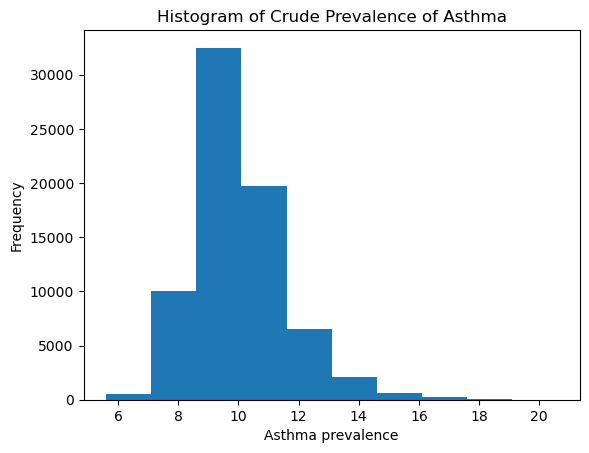

In [140]:
_ = plt.hist(df['Asthma_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Asthma prevalence')
_ = plt.title('Histogram of Crude Prevalence of Asthma')

Visualizing parameters to see any clear correlations.

In [141]:
df.corr()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Asthma_prevalence
PM25,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380,-0.028429
OZONE,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751,0.110788
DSLPM,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680,-0.018982
CANCER,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279,-0.017102
RESP,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408,-0.024781
PTRAF,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891,-0.003949
PRE1960PCT,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079,0.281981
PNPL,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078,0.005500
PRMP,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822,0.127922
PTSDF,0.057516,-0.021075,0.617922,0.154636,0.337806,0.303923,0.214053,0.142546,0.045509,1.000000,0.000967,-0.037394


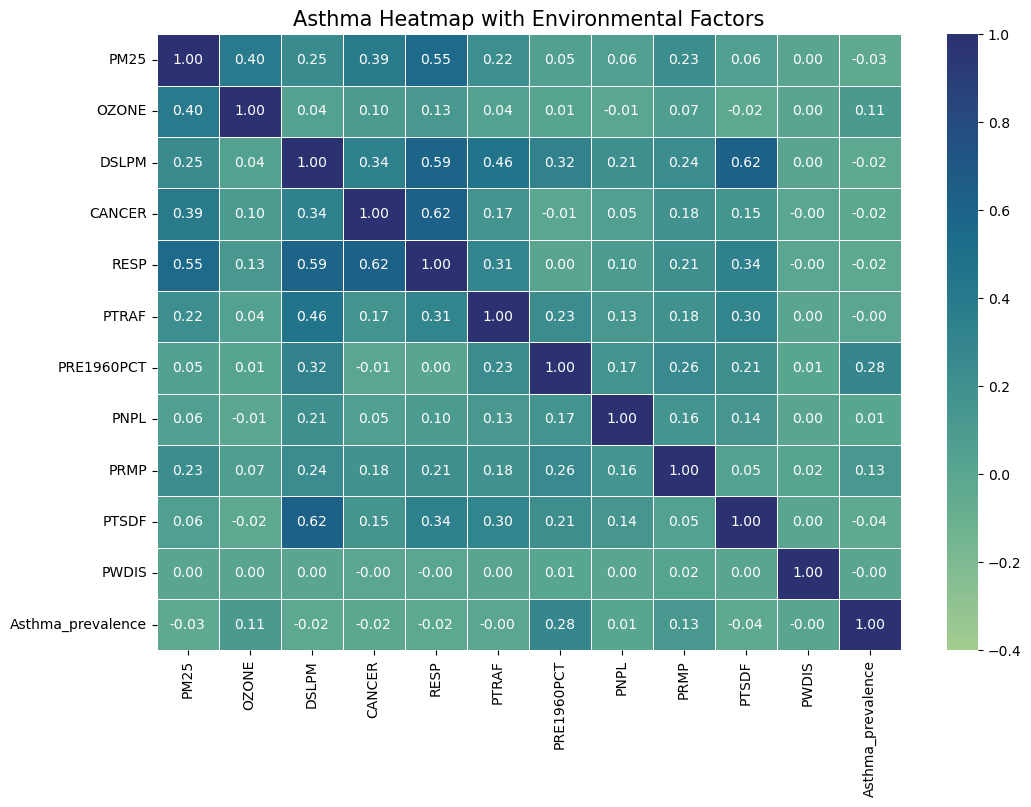

In [142]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Asthma Heatmap with Environmental Factors", fontsize =15)

Only OZONE, PRE1960PCT, and PRMP show a positive correlation to crude prevalence of asthma.

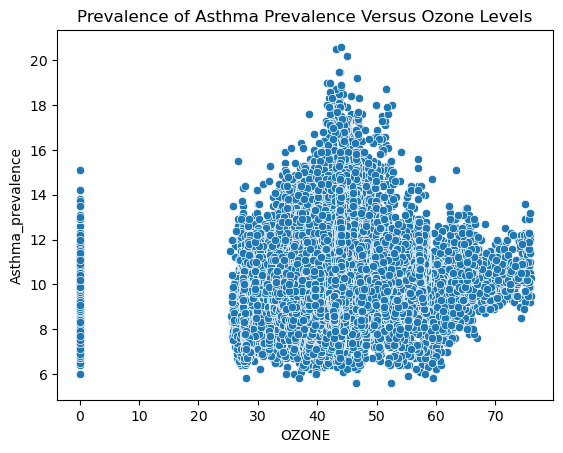

In [143]:
_ = sns.scatterplot(x='OZONE', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Prevalence Versus Ozone Levels')

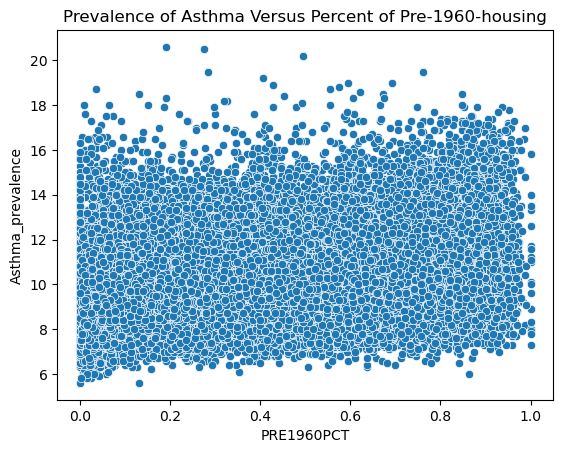

In [144]:
_ = sns.scatterplot(x='PRE1960PCT', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Versus Percent of Pre-1960-housing')

No reasonable correlation.

Asthma prediction using multiple linear regression.

In [145]:
X = df.copy()
X = X.drop(['Asthma_prevalence','PWDIS'], axis=1)
y = df['Asthma_prevalence']
X.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
CensusTract,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841


In [146]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [147]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 11), (18081, 11), (54242, 1), (18081, 1))

In [148]:
asthma_model = sm.OLS(y_train, X_train)
res_asthma = asthma_model.fit()

In [149]:
res_asthma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     776.1
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:38:34   Log-Likelihood:                -97122.
No. Observations:               54242   AIC:                         1.943e+05
Df Residuals:                   54231   BIC:                         1.944e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9993      0.042    214.729      0.000       8.917       9.081
PM25          -0.1450      0.005    -28.442      0.000      -0.155      -0.135
OZONE          0.0302      0.001     33.297      0.000       0.028       0.032
DSLPM         -0.5930      0.026    -22.687      0.000      -0.644      -0.542
CANCER        -0.0006      0.001     -1.090      0.276      -0.002       0.001
RESP           1.4209      0.070     20.205      0.000       1.283       1.559
PTRAF      -2.655e-05   4.37e-06     -6.078      0.000   -3.51e-05    -1.8e-05
PRE1960PCT     1.9104      0.026     72.532      0.000       1.859       1.962
PNPL          -0.1545      0.024     -6.401      0.000      -0.202      -0.107
PRMP           0.1300      0.006     20.845      0.000       0.118       0.142
PTSDF         -0.0029      0.000     -7.350      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     8928.763   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19530.383
Skew:                           0.970   Prob(JB):                         0.00
Kurtosis:                       5.208   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
df2 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//cancer_data.csv')
df2.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Cancer_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,6.2
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,5.0
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,6.2
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.0
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.8


In [151]:
df2.set_index('CensusTract', inplace=True)
df2.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Cancer_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,6.2
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,5.0
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,6.2
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.0
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.8


In [152]:
df2.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/cancer.csv')

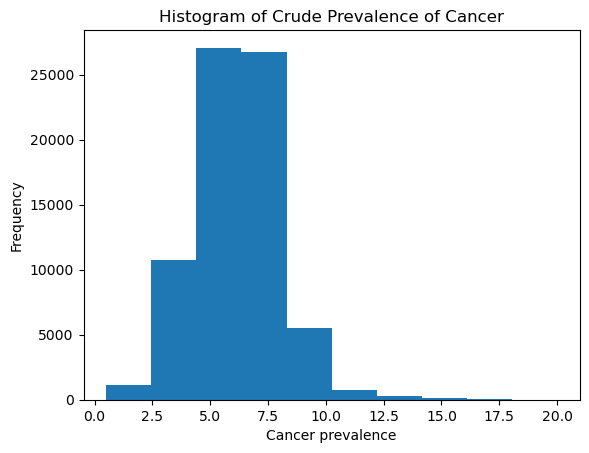

In [153]:
_ = plt.hist(df2['Cancer_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Cancer prevalence')
_ = plt.title('Histogram of Crude Prevalence of Cancer')

In [154]:
df2.corr()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Cancer_prevalence
PM25,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380,-0.219611
OZONE,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751,-0.106416
DSLPM,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680,-0.317580
CANCER,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279,-0.199981
RESP,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408,-0.306677
PTRAF,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891,-0.246381
PRE1960PCT,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079,-0.062947
PNPL,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078,-0.119024
PRMP,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822,-0.220501
PTSDF,0.057516,-0.021075,0.617922,0.154636,0.337806,0.303923,0.214053,0.142546,0.045509,1.000000,0.000967,-0.151194


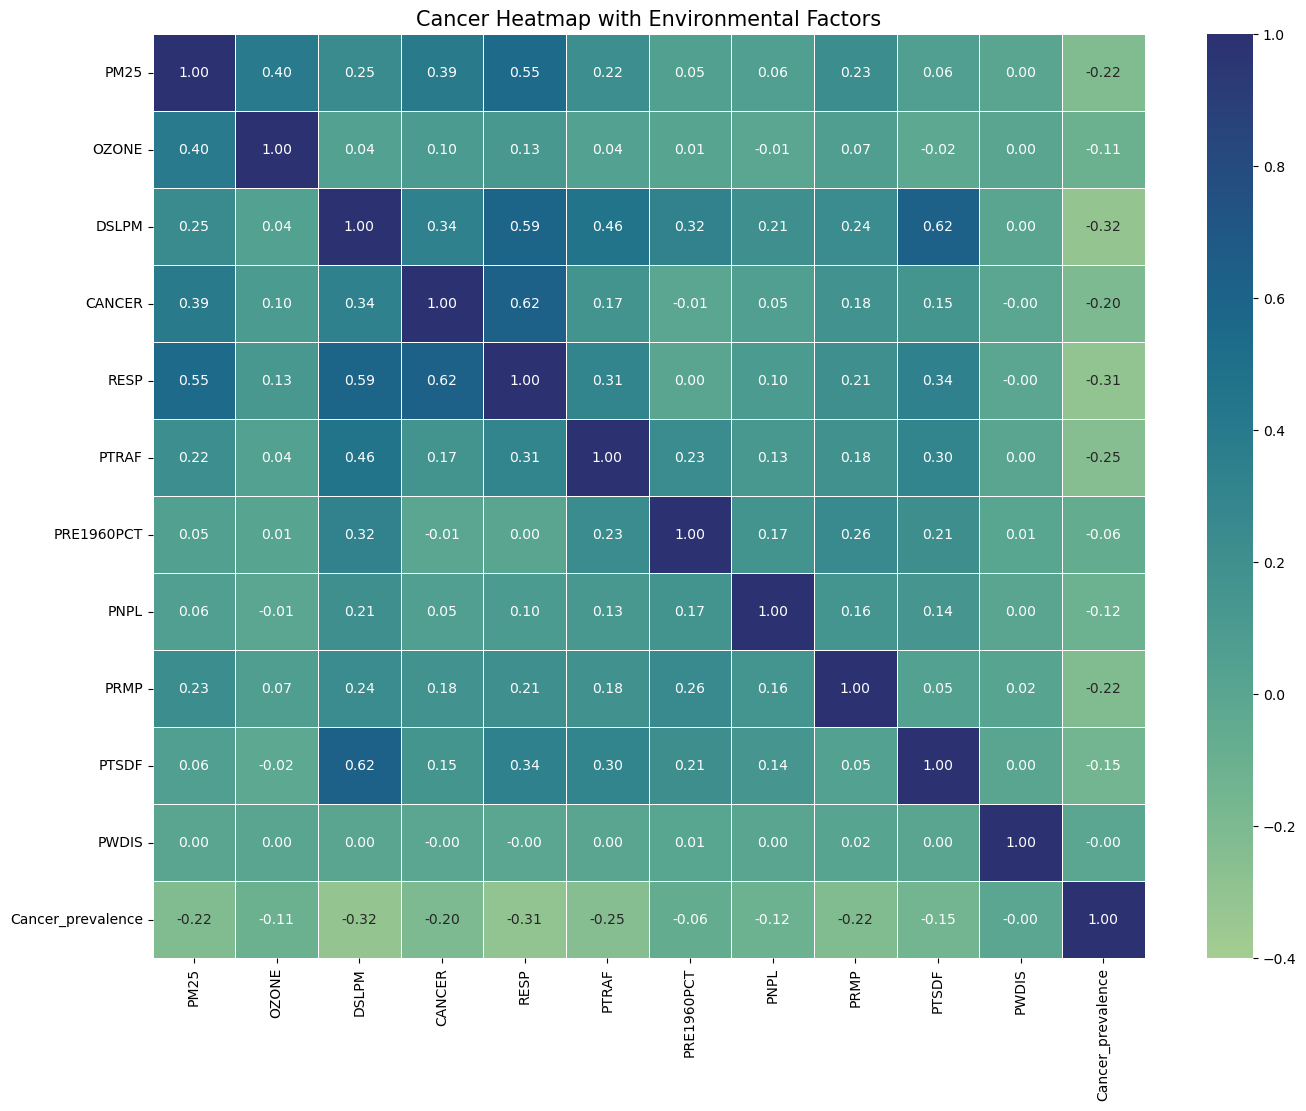

In [155]:
f, ax = plt.subplots(figsize=(16, 12))
_ = sns.heatmap(df2.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Cancer Heatmap with Environmental Factors", fontsize =15)

None of these environmental factors are positively correlated with cancer. 

Cancer prediction using multiple linear regression.

In [156]:
X = df2.copy()
X = X.drop(['Cancer_prevalence', 'PWDIS'], axis=1)


In [157]:
y = df2['Cancer_prevalence']
X.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
CensusTract,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841


In [158]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 11), (18081, 11), (54242, 1), (18081, 1))

In [159]:
cancer_model = sm.OLS(y_train, X_train)
res_cancer = cancer_model.fit()

In [160]:
res_cancer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     1043.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:39:41   Log-Likelihood:            -1.0537e+05
No. Observations:               54242   AIC:                         2.108e+05
Df Residuals:                   54231   BIC:                         2.109e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2942      0.049    169.145      0.000       8.198       8.390
PM25          -0.0399      0.006     -6.710      0.000      -0.052      -0.028
OZONE         -0.0142      0.001    -13.355      0.000      -0.016      -0.012
DSLPM         -0.9316      0.030    -30.985      0.000      -0.991      -0.873
CANCER        -0.0009      0.001     -1.359      0.174      -0.002       0.000
RESP          -1.3301      0.081    -16.499      0.000      -1.488      -1.172
PTRAF         -0.0001   5.01e-06    -23.618      0.000      -0.000      -0.000
PRE1960PCT     0.4219      0.031     13.769      0.000       0.362       0.482
PNPL          -0.3057      0.028    -11.081      0.000      -0.360      -0.252
PRMP          -0.2159      0.007    -29.710      0.000      -0.230      -0.202
PTSDF          0.0034      0.000      7.659      0.000       0.003       0.004
==============================================================================
Omnibus:                    10664.606   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62847.098
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       8.012   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now kidney disease

In [161]:
df3 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/kidney_data.csv')
df3.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Kidney_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,2.9
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,3.1
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,3.0
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,2.9
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,2.4


In [162]:
df3.set_index('CensusTract', inplace=True)
df3.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Kidney_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,2.9
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,3.1
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,3.0
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,2.9
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,2.4


In [163]:
df3.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/kidney.csv')

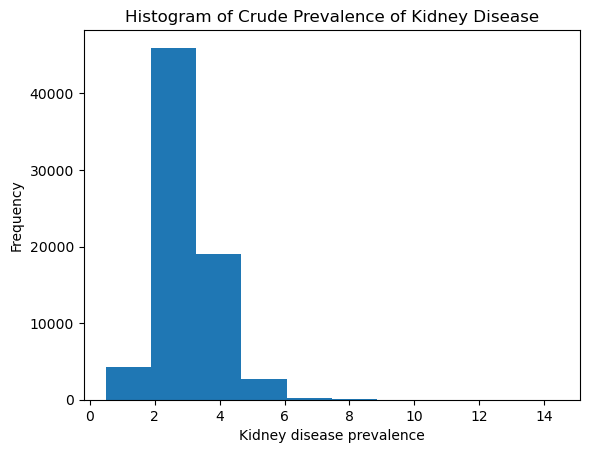

In [164]:
_ = plt.hist(df3['Kidney_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Kidney disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of Kidney Disease')

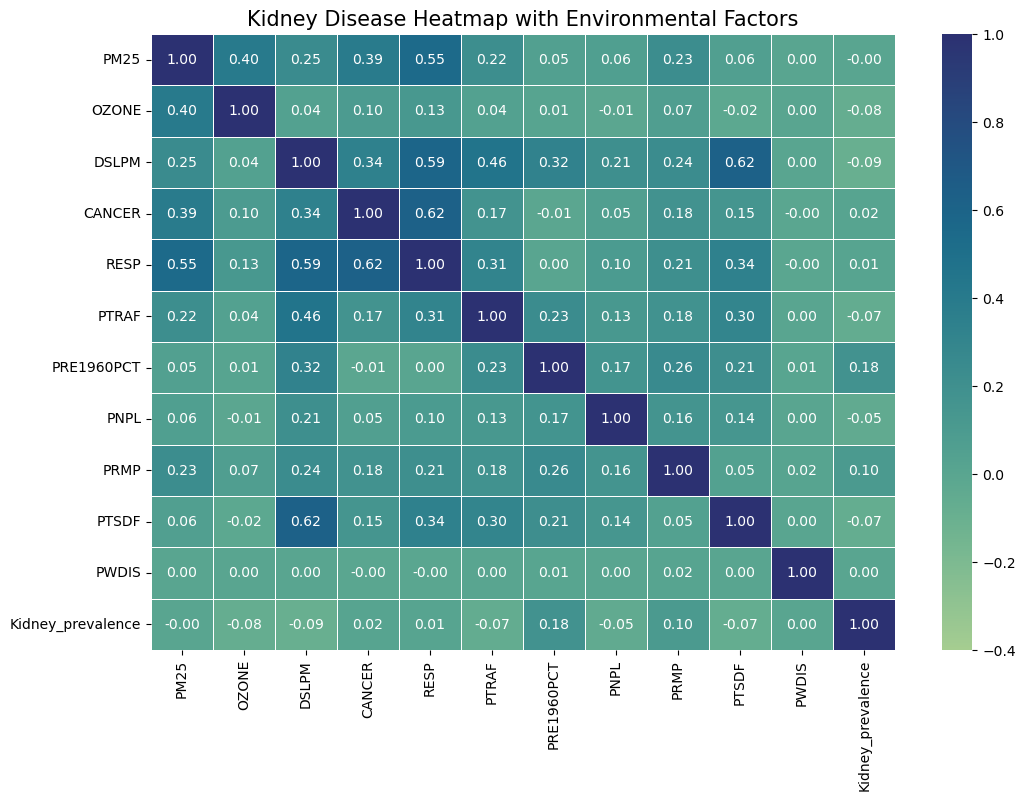

In [165]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df3.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Kidney Disease Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT, and PRMP show a positive correlation of more than .02 to crude prevalence of Kidney problems.

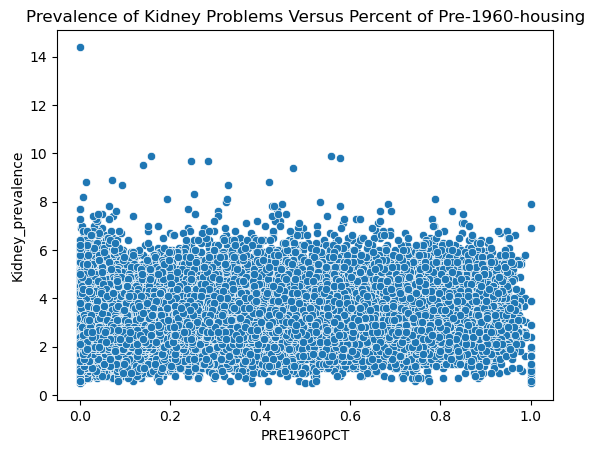

In [166]:
 _ = sns.scatterplot(x='PRE1960PCT', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus Percent of Pre-1960-housing')

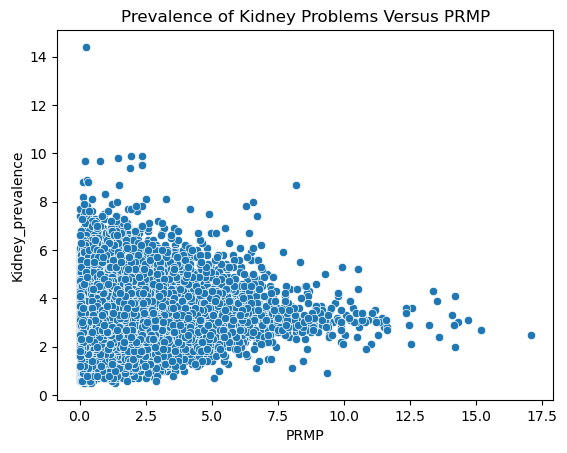

In [167]:
_ = sns.scatterplot(x='PRMP', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Disease Versus PRMP')

No reasonable correlation

Kidney disease prediction using multiple linear regression.

In [168]:
X = df3.copy()
X = X.drop(['Kidney_prevalence', 'PWDIS'], axis=1)
y = df3['Kidney_prevalence']

In [169]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 11), (18081, 11), (54242, 1), (18081, 1))

In [170]:
kidney_model = sm.OLS(y_train, X_train)
res_kidney = kidney_model.fit()

In [171]:
res_kidney.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     590.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:40:21   Log-Likelihood:                -65528.
No. Observations:               54242   AIC:                         1.311e+05
Df Residuals:                   54231   BIC:                         1.312e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9885      0.024    126.789      0.000       2.942       3.035
PM25          -0.0108      0.003     -3.767      0.000      -0.016      -0.005
OZONE         -0.0105      0.001    -20.736      0.000      -0.012      -0.010
DSLPM         -0.5363      0.014    -37.003      0.000      -0.565      -0.508
CANCER         0.0007      0.000      1.583      0.113      -0.000       0.002
RESP           1.0855      0.042     26.119      0.000       1.004       1.167
PTRAF      -3.679e-05   2.45e-06    -15.008      0.000   -4.16e-05    -3.2e-05
PRE1960PCT     0.8724      0.015     59.364      0.000       0.844       0.901
PNPL          -0.1789      0.013    -13.317      0.000      -0.205      -0.153
PRMP           0.0660      0.003     18.854      0.000       0.059       0.073
PTSDF         -0.0008      0.000     -3.766      0.000      -0.001      -0.000
==============================================================================
Omnibus:                    11551.100   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35322.930
Skew:                           1.100   Prob(JB):                         0.00
Kurtosis:                       6.285   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now COPD

In [172]:
df4 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/copd_data.csv')
df4.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Data_Value
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,8.1
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,7.6
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,8.3
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,7.2
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.9


In [173]:
df4.set_index('CensusTract', inplace=True)
df4.rename({'Data_Value':'COPD_prevalence'}, axis=1, inplace=True)
df4.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,COPD_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,8.1
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,7.6
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,8.3
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,7.2
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.9


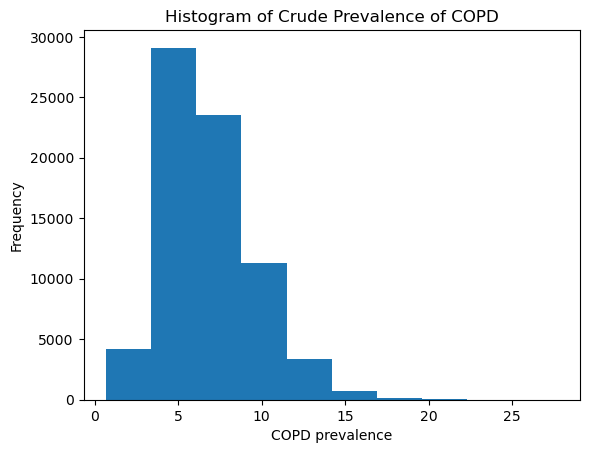

In [174]:
_ = plt.hist(df4['COPD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('COPD prevalence')
_ = plt.title('Histogram of Crude Prevalence of COPD')

In [175]:
df4.corr()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,COPD_prevalence
PM25,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380,-0.039750
OZONE,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751,-0.078967
DSLPM,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680,-0.256896
CANCER,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279,-0.054721
RESP,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408,-0.097198
PTRAF,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891,-0.180631
PRE1960PCT,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079,0.106012
PNPL,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078,-0.095000
PRMP,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822,0.031072
PTSDF,0.057516,-0.021075,0.617922,0.154636,0.337806,0.303923,0.214053,0.142546,0.045509,1.000000,0.000967,-0.147708


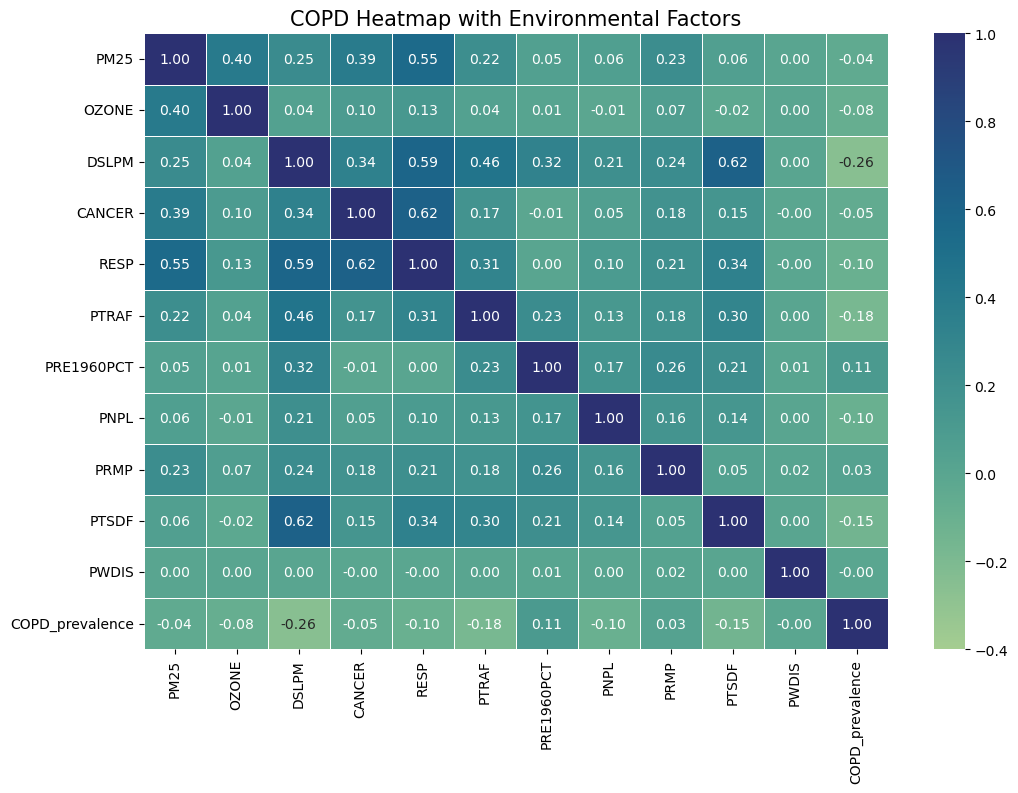

In [176]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df4.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("COPD Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT and PRMP show a positive correlation to crude prevalence of COPD.

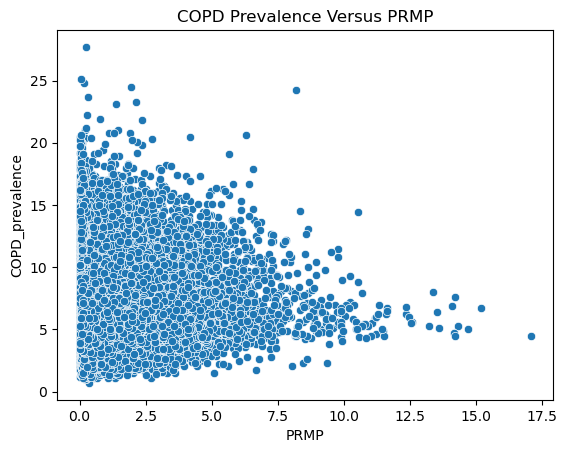

In [177]:
_ = sns.scatterplot(x='PRMP', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus PRMP')

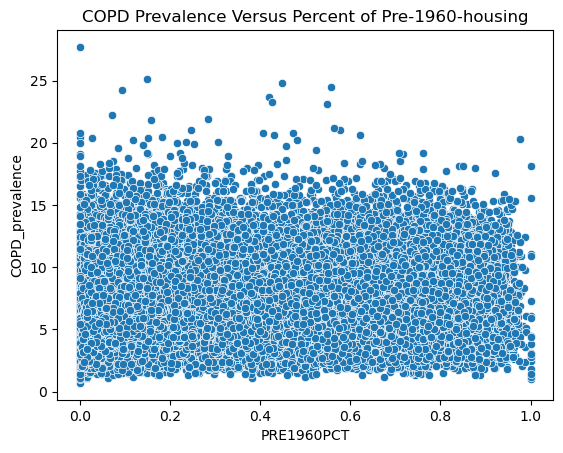

In [178]:
_ = sns.scatterplot(x='PRE1960PCT', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus Percent of Pre-1960-housing')

No reasonable correlations for COPD prevalence.

COPD prediction using multiple linear regression.

In [179]:
X = df4.copy()
X = X.drop(['COPD_prevalence', 'PWDIS'], axis=1)
y = df4['COPD_prevalence']

In [180]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 11), (18081, 11), (54242, 1), (18081, 1))

In [181]:
COPD_model = sm.OLS(y_train, X_train)
res_COPD = COPD_model.fit()

In [182]:
res_COPD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     925.7
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:40:56   Log-Likelihood:            -1.2515e+05
No. Observations:               54242   AIC:                         2.503e+05
Df Residuals:                   54231   BIC:                         2.504e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4506      0.071    105.315      0.000       7.312       7.589
PM25           0.0090      0.009      1.057      0.291      -0.008       0.026
OZONE         -0.0312      0.002    -20.521      0.000      -0.034      -0.028
DSLPM         -2.6509      0.044    -60.901      0.000      -2.736      -2.566
CANCER        -0.0005      0.001     -0.488      0.626      -0.002       0.001
RESP           2.8775      0.116     24.850      0.000       2.651       3.104
PTRAF         -0.0002   7.43e-06    -26.301      0.000      -0.000      -0.000
PRE1960PCT     2.4500      0.044     55.493      0.000       2.363       2.537
PNPL          -0.6941      0.039    -17.817      0.000      -0.771      -0.618
PRMP           0.1623      0.010     15.551      0.000       0.142       0.183
PTSDF          0.0035      0.001      5.558      0.000       0.002       0.005
==============================================================================
Omnibus:                     8801.134   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18554.992
Skew:                           0.972   Prob(JB):                         0.00
Kurtosis:                       5.106   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the R2 value, these features do not predict COPD well.

In [183]:
df4.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/COPD.csv')

Now CHD

In [184]:
df5 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//CHD_data.csv')
df5.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,CHD_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,6.6
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,5.9
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,6.7
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,7.1
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.2


In [185]:
df5.set_index('CensusTract', inplace=True)
df5.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,CHD_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,6.6
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,5.9
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,6.7
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,7.1
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.2


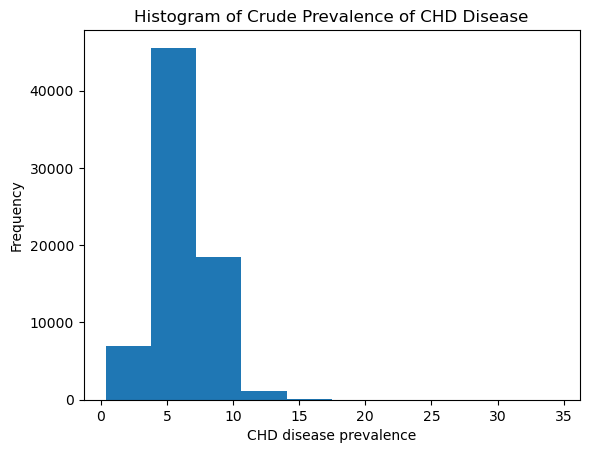

In [186]:
_ = plt.hist(df5['CHD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('CHD disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of CHD Disease')

Visualizing parameters to see any clear correlations.

In [187]:
df5.corr()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,CHD_prevalence
PM25,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380,-0.093471
OZONE,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751,-0.112446
DSLPM,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680,-0.274925
CANCER,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279,-0.089541
RESP,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408,-0.153073
PTRAF,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891,-0.193048
PRE1960PCT,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079,0.082332
PNPL,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078,-0.104218
PRMP,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822,-0.021182
PTSDF,0.057516,-0.021075,0.617922,0.154636,0.337806,0.303923,0.214053,0.142546,0.045509,1.000000,0.000967,-0.144604


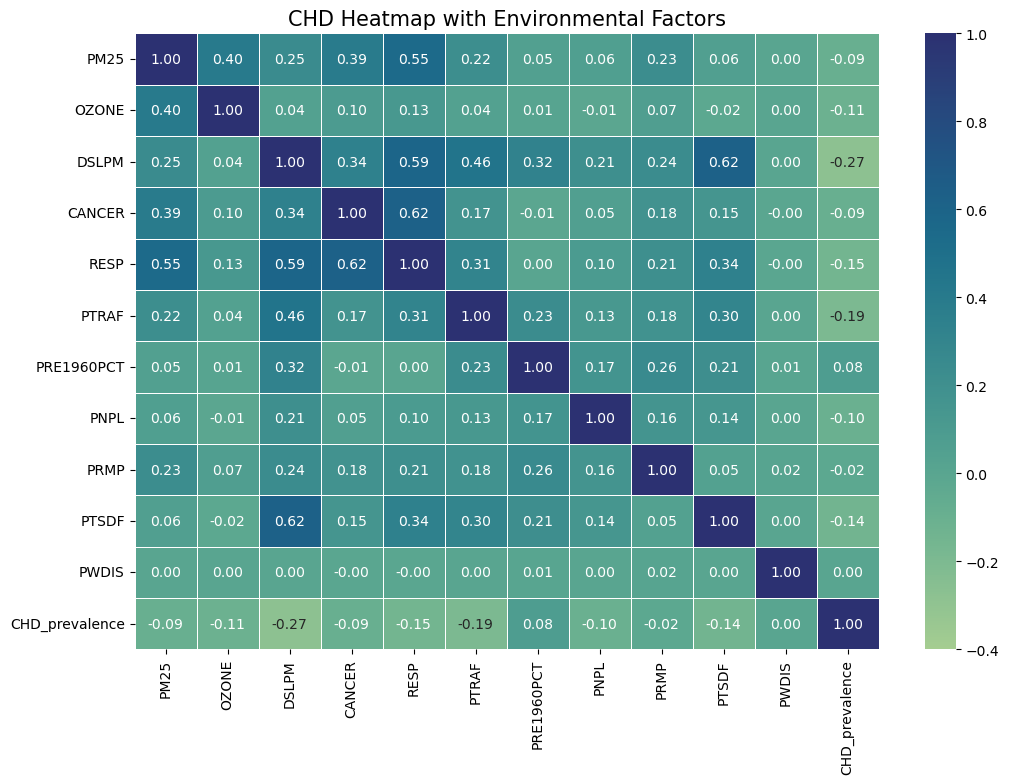

In [188]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df5.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("CHD Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT shows a positive correlation to crude prevalence of CHD.

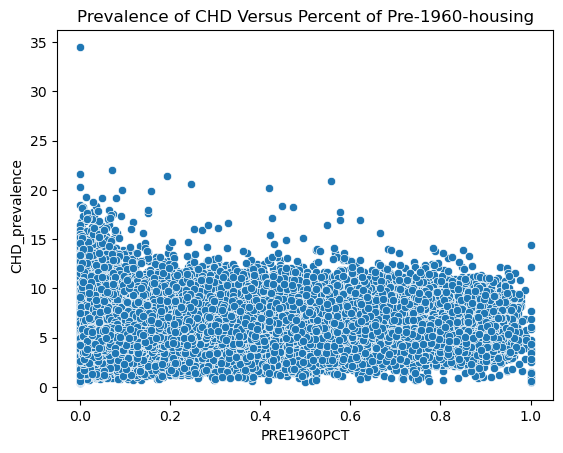

In [189]:
_ = sns.scatterplot(x='PRE1960PCT', y='CHD_prevalence', data=df5)
_ = _.set_title('Prevalence of CHD Versus Percent of Pre-1960-housing')

No reasonable correlation

CHD prediction using multiple linear regression.

In [190]:
X = df5.copy()
X = X.drop(['CHD_prevalence', 'PWDIS'], axis=1)
y = df5['CHD_prevalence']

In [191]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 11), (18081, 11), (54242, 1), (18081, 1))

In [192]:
CHD_model = sm.OLS(y_train, X_train)
res_CHD = CHD_model.fit()

In [193]:
res_CHD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     883.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:41:37   Log-Likelihood:            -1.0981e+05
No. Observations:               54242   AIC:                         2.196e+05
Df Residuals:                   54231   BIC:                         2.197e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3236      0.053    138.746      0.000       7.220       7.427
PM25          -0.0009      0.006     -0.140      0.889      -0.014       0.012
OZONE         -0.0284      0.001    -24.809      0.000      -0.031      -0.026
DSLPM         -1.8572      0.033    -56.756      0.000      -1.921      -1.793
CANCER         0.0004      0.001      0.522      0.602      -0.001       0.002
RESP           1.3168      0.087     15.221      0.000       1.147       1.486
PTRAF         -0.0001   5.58e-06    -24.997      0.000      -0.000      -0.000
PRE1960PCT     1.6570      0.033     49.859      0.000       1.592       1.722
PNPL          -0.5088      0.030    -17.138      0.000      -0.567      -0.451
PRMP           0.0490      0.008      6.260      0.000       0.034       0.064
PTSDF          0.0037      0.000      7.543      0.000       0.003       0.005
==============================================================================
Omnibus:                     9489.242   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33615.849
Skew:                           0.866   Prob(JB):                         0.00
Kurtosis:                       6.446   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
df5.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/CHD.csv')

In [195]:
df6 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//stroke_data.csv')
df6.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Stroke_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,3.1
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,3.7
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,3.3
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,3.0
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,2.4


In [196]:
df6.set_index('CensusTract', inplace=True)
df6.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Stroke_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,3.1
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,3.7
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,3.3
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,3.0
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,2.4


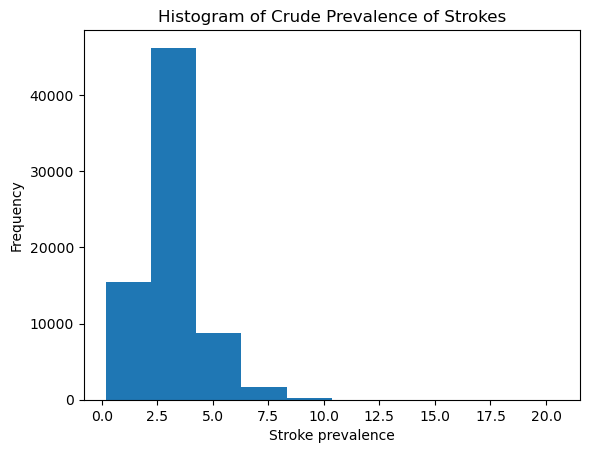

In [197]:
_ = plt.hist(df6['Stroke_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Stroke prevalence')
_ = plt.title('Histogram of Crude Prevalence of Strokes')

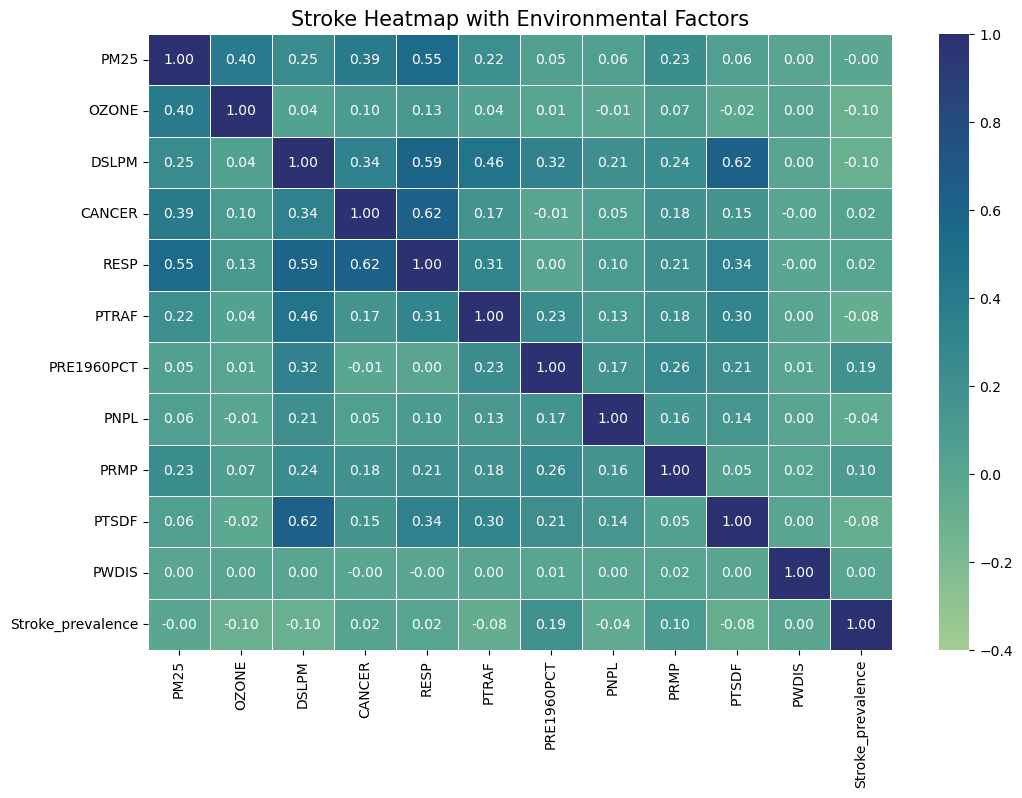

In [198]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df6.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Stroke Heatmap with Environmental Factors", fontsize =15)

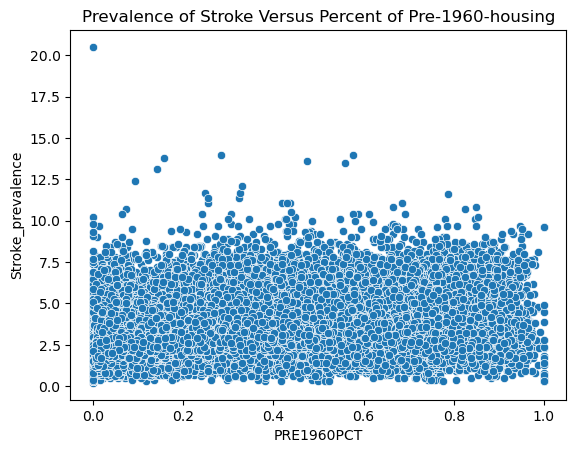

In [199]:
_ = sns.scatterplot(x='PRE1960PCT', y='Stroke_prevalence', data=df6)
_ = _.set_title('Prevalence of Stroke Versus Percent of Pre-1960-housing')

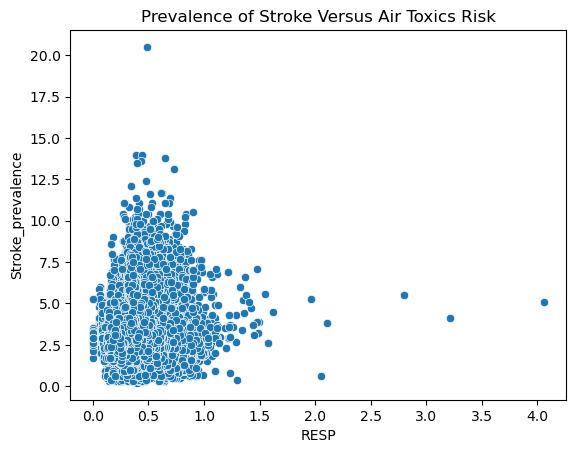

In [200]:
_ = sns.scatterplot(x='RESP', y='Stroke_prevalence', data=df6)
_ = _.set_title('Prevalence of Stroke Versus Air Toxics Risk')

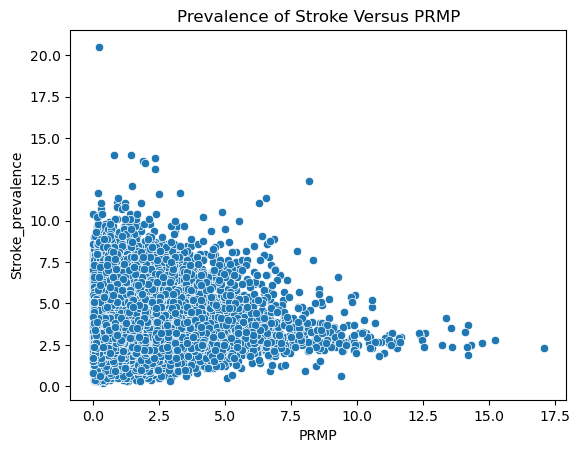

In [201]:
_ = sns.scatterplot(x='PRMP', y='Stroke_prevalence', data=df6)
_ = _.set_title('Prevalence of Stroke Versus PRMP')

In [204]:
X = df6.copy()
X = X.drop(['Stroke_prevalence', 'PWDIS'], axis=1)
y = df6['Stroke_prevalence']

In [205]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 11), (18081, 11), (54242, 1), (18081, 1))

In [206]:
Stroke_model = sm.OLS(y_train, X_train)
res_stroke = Stroke_model.fit()

In [207]:
res_stroke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     690.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:42:13   Log-Likelihood:                -84137.
No. Observations:               54242   AIC:                         1.683e+05
Df Residuals:                   54231   BIC:                         1.684e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3030      0.033     99.887      0.000       3.238       3.368
PM25          -0.0152      0.004     -3.788      0.000      -0.023      -0.007
OZONE         -0.0188      0.001    -26.278      0.000      -0.020      -0.017
DSLPM         -0.7896      0.020    -38.630      0.000      -0.830      -0.750
CANCER         0.0010      0.000      2.039      0.041    3.87e-05       0.002
RESP           1.6954      0.055     30.611      0.000       1.587       1.804
PTRAF      -6.325e-05   3.45e-06    -18.344      0.000      -7e-05   -5.65e-05
PRE1960PCT     1.2884      0.021     62.084      0.000       1.248       1.329
PNPL          -0.2701      0.019    -14.316      0.000      -0.307      -0.233
PRMP           0.0928      0.005     18.968      0.000       0.083       0.102
PTSDF         -0.0017      0.000     -5.673      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    17227.368   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88208.256
Skew:                           1.451   Prob(JB):                         0.00
Kurtosis:                       8.533   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
df6.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/stroke.csv')

In [123]:
df['Stroke_prevalence'] = df6['Stroke_prevalence']

In [124]:
df['CHD_prevalence'] = df5['CHD_prevalence']

In [125]:
df['COPD_prevalence'] = df4['COPD_prevalence']

In [126]:
df['Cancer_prevalence'] = df2['Cancer_prevalence']
df['Kidney_prevalence'] = df3['Kidney_prevalence']

In [127]:
df.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Asthma_prevalence,Stroke_prevalence,CHD_prevalence,COPD_prevalence,Cancer_prevalence,Kidney_prevalence
CensusTract,,,,,,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,9.8,3.1,6.6,8.1,6.2,2.9
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,10.9,3.7,5.9,7.6,5.0,3.1
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,10.1,3.3,6.7,8.3,6.2,3.0
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.8,3.0,7.1,7.2,8.0,2.9
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,9.2,2.4,5.2,5.9,5.8,2.4


In [128]:
df = df.reset_index()

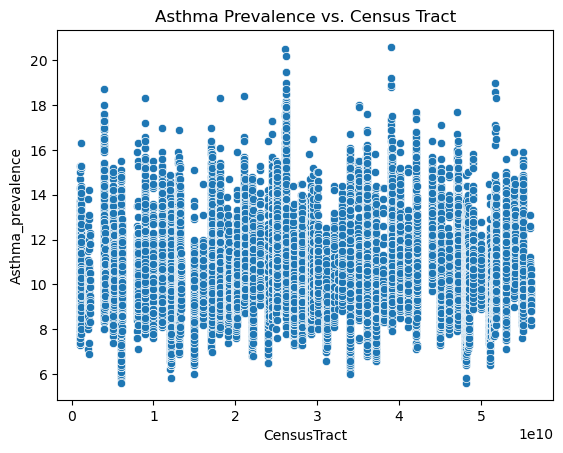

In [129]:
fig = sns.scatterplot(x=df['CensusTract'], y=df['Asthma_prevalence'])
_ = fig.set(title="Asthma Prevalence vs. Census Tract")

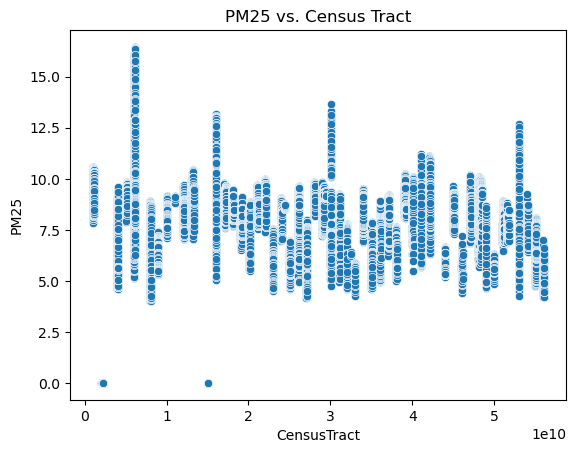

In [130]:
fig = sns.scatterplot(x=df["CensusTract"], y=df["PM25"])
_ = fig.set(title="PM25 vs. Census Tract")

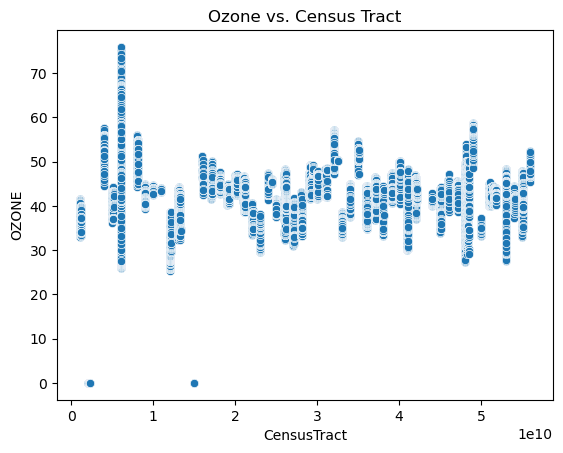

In [131]:
fig = sns.scatterplot(x=df["CensusTract"], y=df["OZONE"])
_ = fig.set(title="Ozone vs. Census Tract")

## None of these diseases can be predicted by multiple linear regression with the environmental factors. All of the R<sup>2</sup> values are very low.